<a href="https://colab.research.google.com/github/linainsaf/image_audio_processing/blob/main/Audio_processing_for_maching_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#listen to an audio file:
path="piano.wav"
ipd.Audio(path)

In [ ]:
#load audio file:
signal,sr=librosa.load(path)
sr

22050

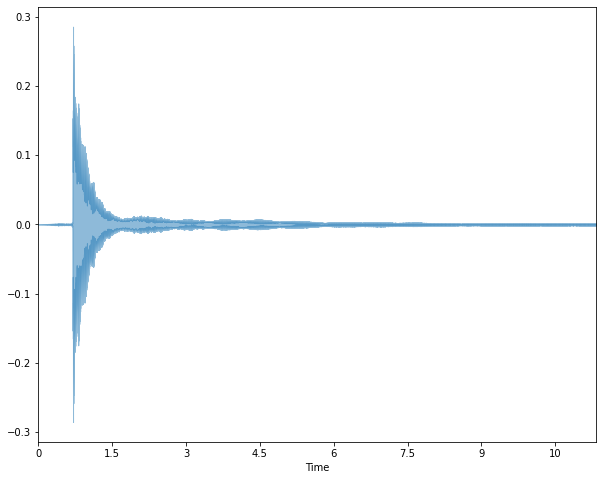

In [ ]:
#plot  waveform:
plt.figure(figsize=(10,8))
librosa.display.waveplot(signal,sr=sr,alpha=0.5)
plt.show()

In [ ]:
#getting the spectrum:
ft=sp.fft.fft(signal)
magnitude=np.absolute(ft)
frequency=np.linspace(0,sr,len(magnitude))

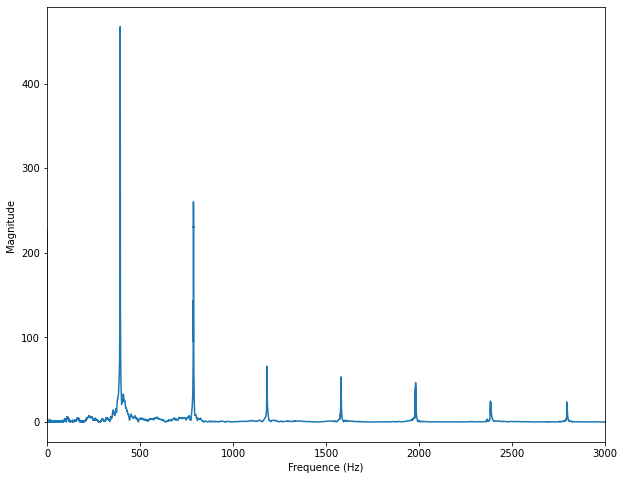

In [ ]:
#plot spectrum:
plt.figure(figsize=(10,8))
plt.plot(frequency,magnitude)
plt.xlim(0,3000)
plt.xlabel("Frequence (Hz)")
plt.ylabel("Magnitude ")
plt.show()



In [ ]:
d=1/sr   #duration of sample
len(signal),d 

(250000, 4.5351473922902495e-05)

In [ ]:
f_main=392 #G4
d_cycle_main=1/f_main
d_cycle_main

0.002551020408163265

In [ ]:
d_400_samp=400*d
d_400_samp

0.018140589569160998

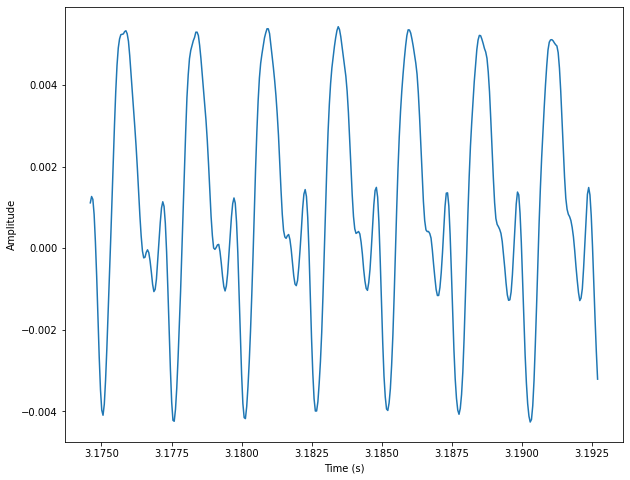

In [ ]:
#zoom in waveform
samples=range(len(signal))
t=librosa.samples_to_time(samples,sr=sr)

plt.figure(figsize=(10,8))
plt.plot(t[70000:70400],signal[70000:70400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

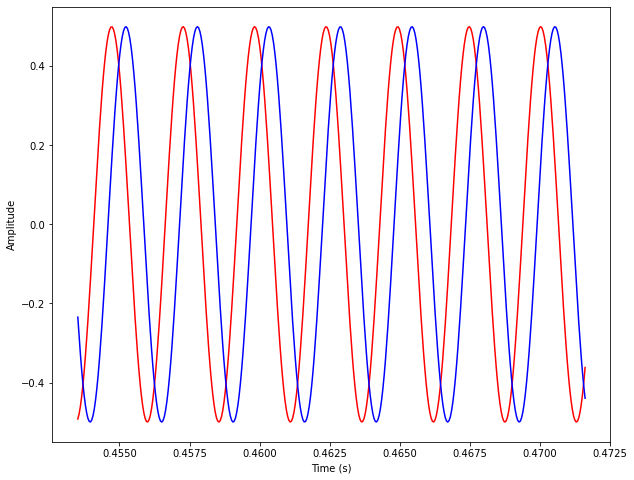

In [ ]:
#creat a sinusoid

f=392
phase=0
phase2=0.2

sin=0.5 * np.sin(2 * np.pi * (f * t - phase))
sin2=0.5 * np.sin(2 * np.pi * (f * t - phase2))

plt.figure(figsize=(10,8))
plt.plot(t[10000:10400],sin[10000:10400],color='r')
plt.plot(t[10000:10400],sin2[10000:10400],color='b')

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

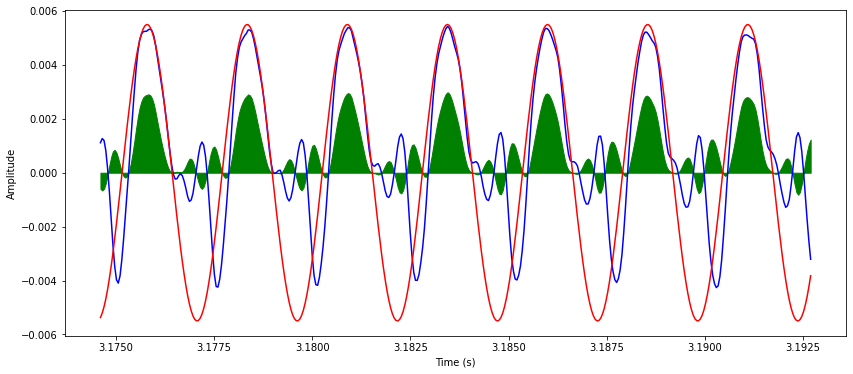

In [ ]:
#compare signal and sinusoid 

f=392
phase=0.66

sin=0.0055 * np.sin(2 * np.pi * (f * t - phase))

plt.figure(figsize=(14,6))
plt.plot(t[70000:70400],signal[70000:70400],color='b')
plt.plot(t[70000:70400],sin[70000:70400],color='r')
plt.fill_between(t[70000:70400], 100*sin[70000:70400]*signal[70000:70400],color='g')

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

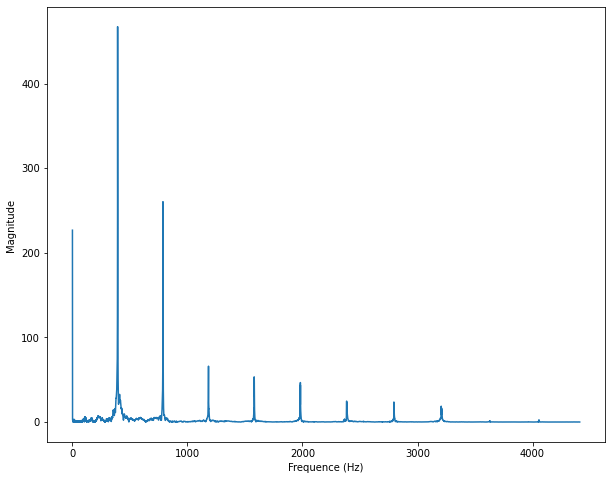

In [ ]:
#plot spectrum
plt.figure(figsize=(10,8))
plt.plot(frequency[:50000],magnitude[:50000])
plt.xlabel("Frequence (Hz)")
plt.ylabel("Magnitude ")
plt.show()


In [ ]:
def create_signal(frequency, time):
    sin = np.sin(2 * np.pi * (frequency * time))
    sin2 = np.sin(2 * np.pi * (2 * frequency * time))
    sin3 = np.sin(2 * np.pi * (3 * frequency * time))

    return sin + sin2 + sin3

In [ ]:
def calculate_centre_of_gravity(mult_signal):
    x_centre = np.mean([x.real for x in mult_signal])
    y_centre = np.mean([x.imag for x in mult_signal])
    return x_centre, y_centre

In [ ]:
def calculate_sum(mult_signal):
    x_sum = np.sum([x.real for x in mult_signal])
    y_sum = np.sum([x.imag for x in mult_signal])
    return x_sum, y_sum

In [ ]:
def create_pure_tone(frequency, time):
    angle = -2 * np.pi * frequency * time
    return np.cos(angle) + 1j * np.sin(angle)

In [ ]:
def plot_fourier_transform(pure_tone_frequency, 
                           signal_frequency, 
                           time, 
                           plot_centre_of_gravity=False,
                           plot_sum=False):
    
    # create sinusoid and signal
    pure_tone = create_pure_tone(pure_tone_frequency, time)
    signal = create_signal(signal_frequency, time)
    
    # multiply pure tone and signal
    mult_signal = pure_tone * signal
    
    X = [x.real for x in mult_signal]
    Y = [x.imag for x in mult_signal]

    plt.figure(figsize=(15, 10))
    plt.plot(X, Y)

    # calculate and plot centre of gravity
    if plot_centre_of_gravity:
        centre_of_gravity = calculate_centre_of_gravity(mult_signal)
        plt.plot([centre_of_gravity[0]], [centre_of_gravity[1]], marker='o', markersize=10, color="red")


    # calculate and plot sum 
    if plot_sum:
        integral = calculate_sum(mult_signal)
        plt.plot([integral[0]], [integral[1]], marker='o', markersize=10, color="green")

    
    # set origin axes
    ax = plt.gca()
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    if not plot_sum:
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)

    plt.show()


In [ ]:
def plot_signal(signal, time):
    plt.figure(figsize=(12, 8))
    plt.plot(signal, time)
    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.show()

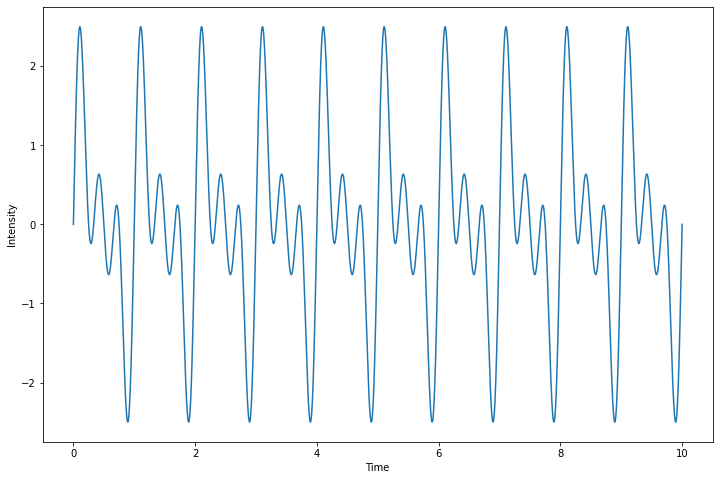

In [ ]:
time = np.linspace(0, 10, 10000)
signal = create_signal(frequency=1, time=time)
plot_signal(time, signal)

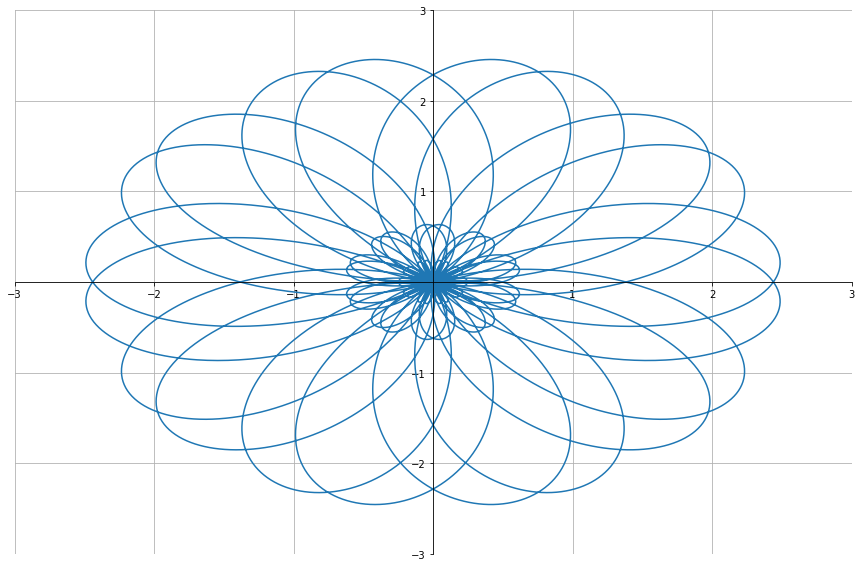

In [ ]:
time = np.linspace(0, 10, 10000)
plot_fourier_transform(pure_tone_frequency=1.1,
                       signal_frequency=1,
                       time=time,
                       plot_centre_of_gravity=False,
                       plot_sum=False)

In [ ]:
#get paths to audio files
piano_path="piano.wav"
violin_path="violon.wav"
saxo_path="saxo.wav"
noise_path="noise.wav"

In [ ]:
#listen to piano audio
ipd.Audio(piano_path)

In [ ]:
#listen to violin audio
ipd.Audio(violin_path)


In [ ]:
#listen to saxo audio
ipd.Audio(saxo_path)

In [ ]:
#listen to noise audio
ipd.Audio(noise_path)

In [ ]:
#load audio files:
piano,sr=librosa.load(piano_path)
saxo,_=librosa.load(saxo_path)
violin,_=librosa.load(violin_path)
noise,_=librosa.load(noise_path)

In [ ]:
violin.shape 

(59772,)

In [ ]:
#get the tf 
violin_ft=np.fft.fft(violin)
violin_ft.shape, violin_ft[10]

((59772,), (-0.005859721431596489-0.18139412366776658j))

In [ ]:
#get the magnitude
magnitude_spectrum_violin=np.abs(violin_ft)
magnitude_spectrum_violin[10]

0.1814887446550141

In [ ]:
def plot_magnitud_spectrum(signal,title,sr,f_rat=1):
  ft= np.fft.fft(signal)
  magnitude_spectrum=np.abs(ft)

  #plot magnitude spectrum
  plt.figure(figsize=(12,6))

  frequency=np.linspace(0,sr,len(magnitude_spectrum))
  num_frequency_bins=int(len(frequency)*f_rat)

  plt.plot(frequency [:num_frequency_bins],magnitude_spectrum[:num_frequency_bins])
  plt.xlabel("Frequency (Hz)")
  plt.title(title)

  plt.show

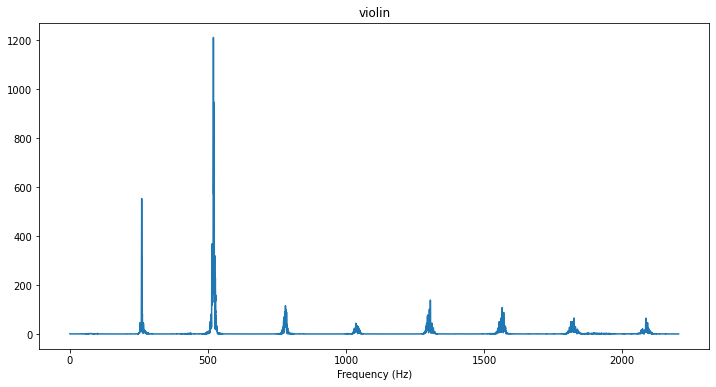

In [ ]:
plot_magnitud_spectrum(violin,"violin",sr,f_rat=0.1)

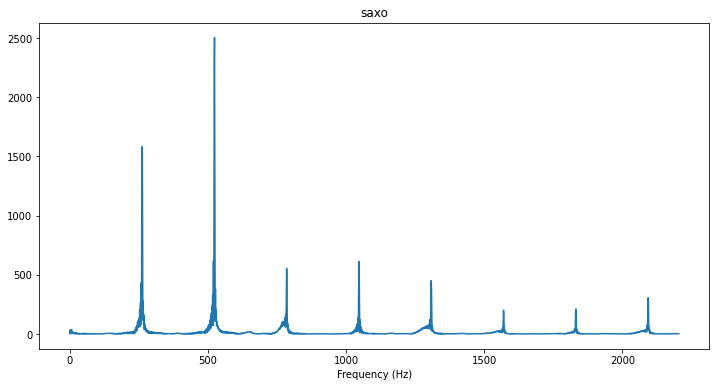

In [ ]:
plot_magnitud_spectrum(saxo,"saxo",sr,f_rat=0.1)

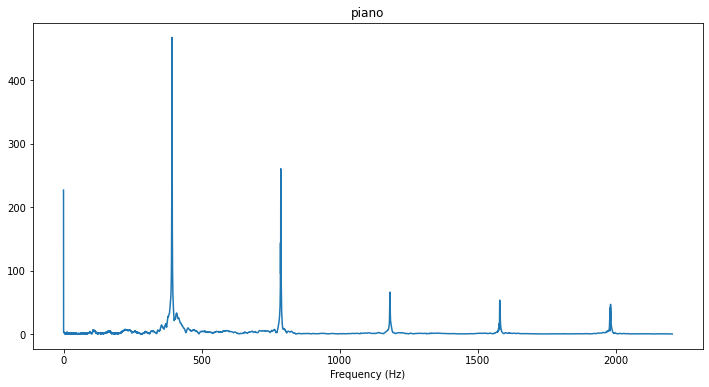

In [ ]:
plot_magnitud_spectrum(piano,"piano",sr,f_rat=0.1)

In [ ]:
scale_path="scale.wav"
scale,sr=librosa.load(scale_path)

In [ ]:
frame_size=2048
hope_size=512

In [ ]:
stft=librosa.stft(scale,n_fft=frame_size,hop_length=hope_size)

In [ ]:
stft.shape

(1025, 342)

In [ ]:
stft_scale=np.abs(stft)**2

In [ ]:
def plot_spectrogram(stft_scale,sr,hop_length,y_axis="linear"):
  plt.figure(figsize=(14,6))
  librosa.display.specshow(stft_scale,sr=sr,hop_length=hop_length,x_axis="time",y_axis=y_axis)
  plt.colorbar(format="%+2.f")

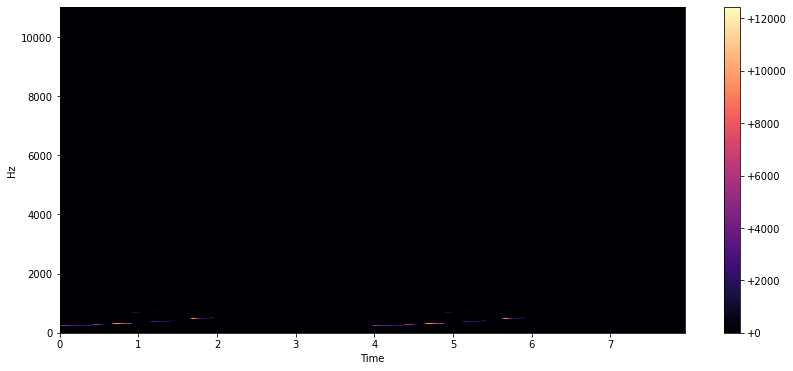

In [ ]:
plot_spectrogram(stft_scale=stft_scale,sr=sr,hop_length=hope_size)

In [ ]:
stft_log=librosa.power_to_db(stft_scale)

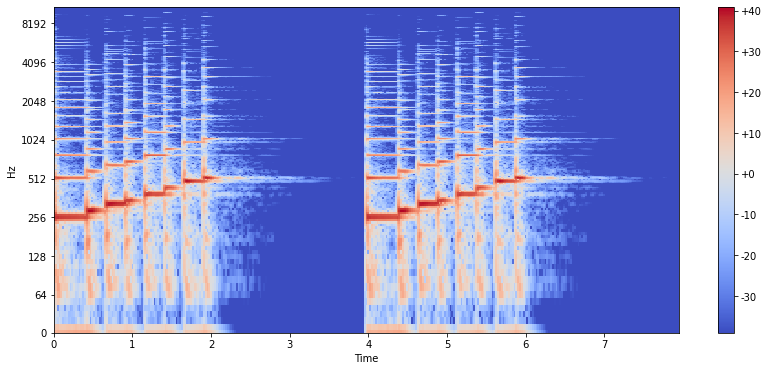

In [ ]:
plot_spectrogram(stft_log,sr=sr,hop_length=hope_size,y_axis="log")

In [ ]:
piano,sr=librosa.load(piano_path)

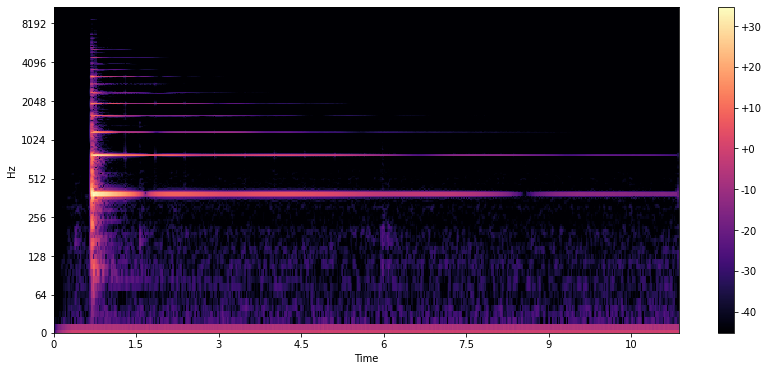

In [ ]:
stft=librosa.stft(piano,n_fft=frame_size,hop_length=hope_size)
stft_log=librosa.power_to_db(np.abs(stft)**2)
plot_spectrogram(stft_log,sr=sr,hop_length=hope_size,y_axis="log")

In [ ]:
violin,sr=librosa.load(violin_path)

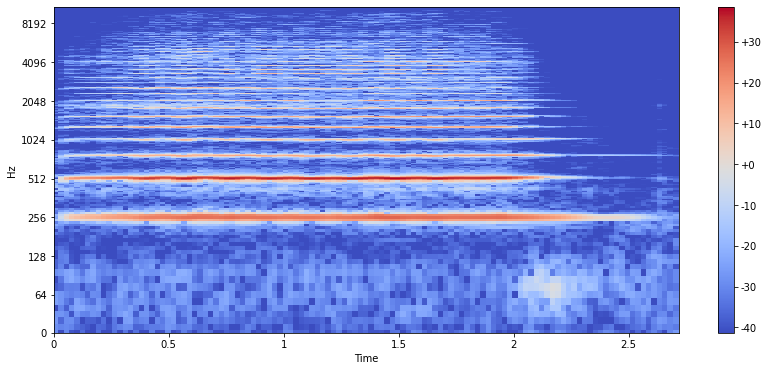

In [ ]:
stft=librosa.stft(violin,n_fft=frame_size,hop_length=hope_size)
stft_log=librosa.power_to_db(np.abs(stft)**2)
plot_spectrogram(stft_log,sr=sr,hop_length=hope_size,y_axis="log")